<h2>Gabriel Nemeth Regression Analysis</h2><br>

   - This code runs regression models to see what variables statistically affect the birth weight of a newborn baby.

In [1]:
# importing libraries
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # essential graphical output
import numpy as np # mathematical essentials
import seaborn as sns # enhanced graphical output
import statsmodels.formula.api as smf # regression modeling


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# specifying file name
file = './A1 Regression Analysis/birthweight_low.xlsx'


# reading the file into Python
birthweight = pd.read_excel(io = file)


# outputting the first ten rows of the dataset
birthweight.head(n=10)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
0,69,NaN,5,2.0,62,NaN,4,7,23,9,1,0,1,0,0,1,0,697
1,68,12.0,3,10.0,61,11.0,4,6,25,11,1,1,0,0,1,0,0,1290
2,71,12.0,3,6.0,46,12.0,2,7,21,12,1,0,1,0,0,1,0,1490
3,59,16.0,1,8.0,48,16.0,7,8,21,10,0,0,0,1,0,0,1,1720
4,48,12.0,4,6.0,39,12.0,2,9,17,13,0,1,0,0,1,0,0,1956
5,67,11.0,4,8.0,40,8.0,4,9,16,14,0,1,0,0,1,0,0,1984
6,54,12.0,2,12.0,46,12.0,9,9,17,12,1,0,1,0,0,1,0,2050
7,71,14.0,4,7.0,51,11.0,9,8,15,13,0,1,0,0,1,0,0,2068
8,56,12.0,1,9.0,53,14.0,8,9,14,9,1,1,0,0,1,0,0,2148
9,58,12.0,2,12.0,61,16.0,9,9,13,6,0,0,1,0,0,1,0,2180


In [2]:
# looping to print column names one by one
for column in birthweight:
    print(column)

mage
meduc
monpre
npvis
fage
feduc
omaps
fmaps
cigs
drink
male
mwhte
mblck
moth
fwhte
fblck
foth
bwght


In [3]:
# using descriptive statistics for numeric data
birthweight.describe(include = 'number').round(2)

,mage,meduc,monpre,npvis,fage,feduc,omaps,fmaps,cigs,drink,male,mwhte,mblck,moth,fwhte,fblck,foth,bwght
count,196.00,193.00,196.00,193.00,196.00,189.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00,196.00
mean,40.15,13.91,2.34,11.60,39.29,13.85,8.19,8.96,10.93,5.40,0.55,0.27,0.38,0.35,0.35,0.34,0.31,3334.09
std,10.25,2.06,1.36,4.27,8.98,2.63,1.58,0.65,6.10,3.00,0.50,0.45,0.49,0.48,0.48,0.48,0.46,646.70
min,23.00,8.00,1.00,2.00,23.00,1.00,2.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,697.00
25%,33.00,12.00,2.00,10.00,34.75,12.00,8.00,9.00,6.00,4.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2916.25
50%,39.00,14.00,2.00,12.00,38.00,14.00,9.00,9.00,11.00,5.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,3452.00
75%,46.00,16.00,3.00,12.00,43.00,16.00,9.00,9.00,15.25,7.25,1.00,1.00,1.00,1.00,1.00,1.00,1.00,3759.50
max,71.00,17.00,8.00,35.00,73.00,17.00,10.00,10.00,25.00,14.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,4933.00


In [4]:
# log transforming birthweight and saving it to the dataset
birthweight['log_bwght'] = np.log(birthweight['bwght'])

# log transforming father's age and saving it to the dataset
birthweight['log_fage'] = np.log(birthweight['fage'])

# log transforming mother's age and saving it to the dataset
birthweight['log_mage'] = np.log(birthweight['mage'])

# log transforming mother's education and saving it to the dataset
birthweight['log_meduc'] = np.log(birthweight['meduc'])

# log transforming father's education and saving it to the dataset
birthweight['log_feduc'] = np.log(birthweight['feduc'])

Performed the transformations above to see which variables I'd decide to log based on the histograms below. Compared the regular observation with the logarithmic one to choose.

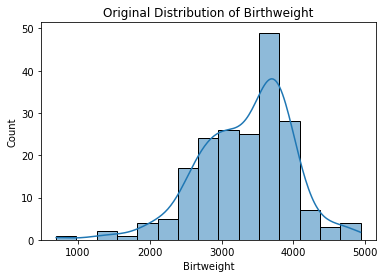

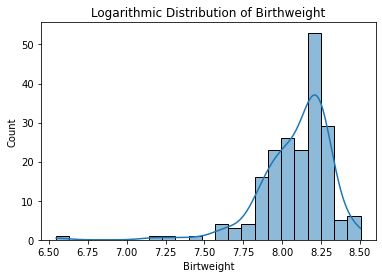

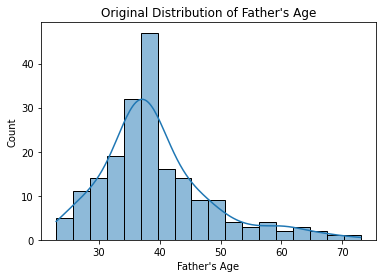

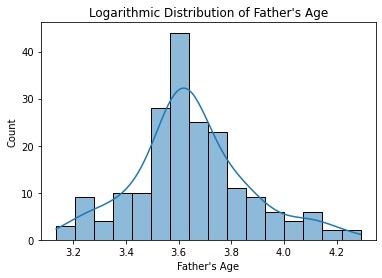

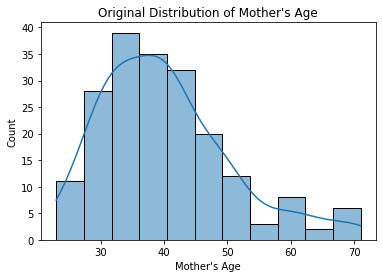

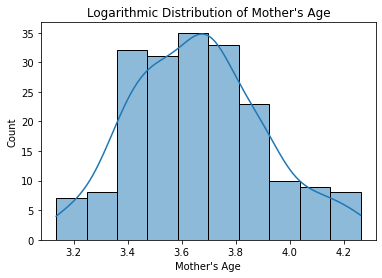

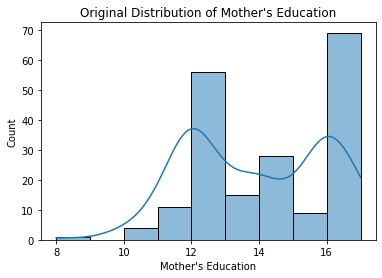

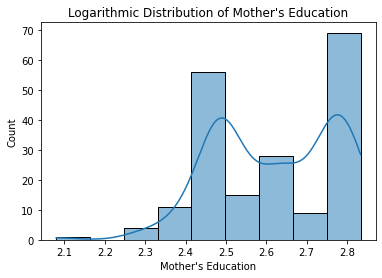

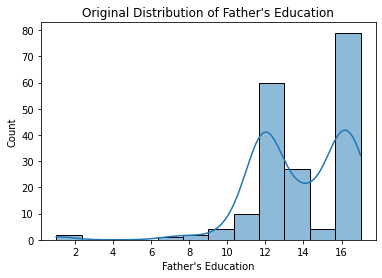

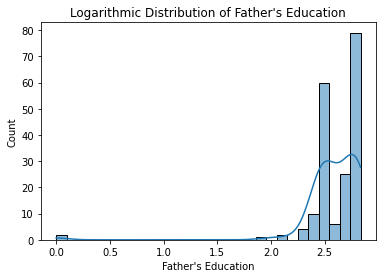

In [5]:
# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Birthweight")
plt.xlabel(xlabel = "Birtweight") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_bwght',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Birthweight")
plt.xlabel(xlabel = "Birtweight") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Father's Age")
plt.xlabel(xlabel = "Father's Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_fage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Father's Age")
plt.xlabel(xlabel = "Father's Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother's Age")
plt.xlabel(xlabel = "Mother's Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_mage',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's Age")
plt.xlabel(xlabel = "Mother's Age") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Mother's Education")
plt.xlabel(xlabel = "Mother's Education") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_meduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Mother's Education")
plt.xlabel(xlabel = "Mother's Education") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Original Distribution of Father's Education")
plt.xlabel(xlabel = "Father's Education") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

# developing a histogram using HISTPLOT
sns.histplot(data   = birthweight,
          x      = 'log_feduc',
          kde    = True)


# title and axis labels
plt.title(label   = "Logarithmic Distribution of Father's Education")
plt.xlabel(xlabel = "Father's Education") 
plt.ylabel(ylabel = "Count")

# displaying the histogram
plt.show()

Split the data into Continuous, Interval/Count, and Categorical groups.

In [6]:
# taking the birthweight dataset ,transforming it into boolean based on 
# if a value is null and then summing together the results per column

birthweight.isnull().sum(axis=0)

mage         0
meduc        3
monpre       0
npvis        3
fage         0
feduc        7
omaps        0
fmaps        0
cigs         0
drink        0
male         0
mwhte        0
mblck        0
moth         0
fwhte        0
fblck        0
foth         0
bwght        0
log_bwght    0
log_fage     0
log_mage     0
log_meduc    3
log_feduc    7
dtype: int64

In [7]:
# looping to detect features with missing values
for col in birthweight:

    # creating columns with 1s if missing and 0 if not
    if birthweight[col].isnull().astype(int).sum() > 0:
        birthweight['m_'+col] = birthweight[col].isnull().astype(int)


# summing the missing value flags to check the results of the loop above
birthweight.iloc[ : ,  -3:].sum(axis = 0)

m_feduc        7
m_log_meduc    3
m_log_feduc    7
dtype: int64

Based on the observations that contained missing values, I thought that using the mean would be ideal. In my mind it made sense to use the mean for the years of education as well as for the total number of prenatal visits because there are not that many significant outliers in the dataset.

In [8]:
# instantiating an imputation value
fill = birthweight['meduc'].mean()


# imputing 'meduc'
birthweight['meduc'] = birthweight['meduc'].fillna(value = fill)


# instantiating an imputation value
fill = birthweight['npvis'].mean()


# imputing 'npvis'
birthweight['npvis'] = birthweight['npvis'].fillna(value = fill)


# instantiating an imputation value
fill = birthweight['feduc'].mean()


# imputing 'feduc'
birthweight['feduc'] = birthweight['feduc'].fillna(value = fill)

# instantiating an imputation value
fill = birthweight['log_feduc'].mean()


# imputing 'log_feduc'
birthweight['log_feduc'] = birthweight['log_feduc'].fillna(value = fill)

# instantiating an imputation value
fill = birthweight['log_meduc'].mean()


# imputing 'log_meduc'
birthweight['log_meduc'] = birthweight['log_meduc'].fillna(value = fill)


In [9]:
# making sure all missing values have been taken care of
birthweight.isnull().any(axis=0)

mage           False
meduc          False
monpre         False
npvis          False
fage           False
feduc          False
omaps          False
fmaps          False
cigs           False
drink          False
male           False
mwhte          False
mblck          False
moth           False
fwhte          False
fblck          False
foth           False
bwght          False
log_bwght      False
log_fage       False
log_mage       False
log_meduc      False
log_feduc      False
m_meduc        False
m_npvis        False
m_feduc        False
m_log_meduc    False
m_log_feduc    False
dtype: bool

The codes below can be used to develop a scatterplot and a box plot to better analyze the relationship between our dependent variable and other independent variables. To analyze a different independent variable all you have to do is change the 'x' variable.

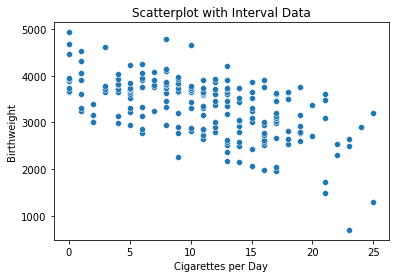

In [10]:
# developing a scatterplot
sns.scatterplot(x    = 'cigs',
                y    = 'bwght',
                data = birthweight)


# titles and axis labels
plt.title(label   = 'Scatterplot with Interval Data')
plt.xlabel(xlabel = 'Cigarettes per Day')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

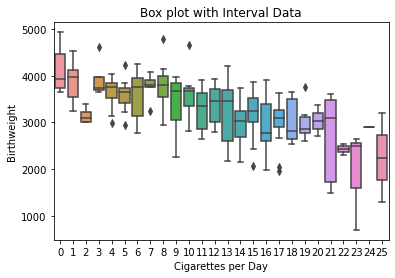

In [11]:
# developing a box plot
sns.boxplot(x    = 'cigs',
                y    = 'bwght',
                data = birthweight)


# titles and axis labels
plt.title(label   = 'Box plot with Interval Data')
plt.xlabel(xlabel = 'Cigarettes per Day')
plt.ylabel(ylabel = 'Birthweight')


# displaying the plot
plt.show()

Next, I created a correlation to see each of the independent variables' relationship with the dependent variable (bwght).

In [12]:
# creating a (Pearson) correlation matrix
df_corr = birthweight.corr().round(2)


# printing (Pearson) correlations with bwght
print(df_corr.loc['bwght'].sort_values(ascending = False))

bwght          1.00
log_bwght      0.97
omaps          0.25
fmaps          0.25
log_feduc      0.16
feduc          0.13
mblck          0.13
fblck          0.12
male           0.11
log_meduc      0.09
meduc          0.09
npvis          0.06
m_npvis        0.06
m_log_feduc   -0.00
m_feduc       -0.00
moth          -0.02
fwhte         -0.04
monpre        -0.05
foth          -0.08
mwhte         -0.11
m_meduc       -0.13
m_log_meduc   -0.13
log_fage      -0.38
fage          -0.40
log_mage      -0.42
mage          -0.46
cigs          -0.57
drink         -0.74
Name: bwght, dtype: float64


Instead of typing one variable at a time, used the code below to generate all the x-variables that I would be able to run the regression. I would use all of them agains the y-variable and then depending on the p-value, I would drop some.

In [13]:
# making a copy of housing
birthweight_explanatory = birthweight.copy()


# dropping SalePrice and Order from the explanatory variable set
birthweight_explanatory = birthweight_explanatory.drop([
                                 'bwght',
                                 'log_bwght'], axis = 1)


# formatting each explanatory variable for statsmodels
for val in birthweight_explanatory:
    print(f'{val} +')

mage +
meduc +
monpre +
npvis +
fage +
feduc +
omaps +
fmaps +
cigs +
drink +
male +
mwhte +
mblck +
moth +
fwhte +
fblck +
foth +
log_fage +
log_mage +
log_meduc +
log_feduc +
m_meduc +
m_npvis +
m_feduc +
m_log_meduc +
m_log_feduc +


In [14]:
# dropping some flagged variables
birthweight_explanatory = birthweight_explanatory.drop(['m_meduc',
                                                         'm_npvis',
                                                         'm_feduc',
                                                         'm_log_meduc',
                                                         'm_log_feduc'], axis = 1)

In [15]:
# checking elements in columns
birthweight_explanatory.columns

Index(['mage', 'meduc', 'monpre', 'npvis', 'fage', 'feduc', 'omaps', 'fmaps', 'cigs', 'drink', 'male', 'mwhte', 'mblck', 'moth', 'fwhte', 'fblck', 'foth', 'log_fage', 'log_mage', 'log_meduc', 'log_feduc'], dtype='object')

I inputed all these variables above in the regression model below. I ran the model against log_bwght as well as bwght and went from including all the x-variables to the ones below. This combination gave me the highest r squared.

In [16]:
# building a full model

# blueprinting a model type
lm_full = smf.ols(formula = """bwght ~ 
mage+
cigs+
drink+
mwhte+
mblck+
moth+
fwhte+
fblck+
foth
""",
                               data = birthweight)


# telling Python to run the data through the blueprint
results_full = lm_full.fit()


# printing the results
results_full.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  bwght   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     64.57
Date:                Wed, 24 Nov 2021   Prob (F-statistic):           1.12e-46
Time:                        16:09:37   Log-Likelihood:                -1426.0
No. Observations:                 196   AIC:                             2868.
Df Residuals:                     188   BIC:                             2894.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2970.7332     66.826     44.455      0.000    2838.908    3102.559
mage         -14.4535      2.688     -5.376      0.000     -19.757      -9.150
cigs         -36.4272      4.610     -7.901      0.000     -45.522     -27.333
drink       -117.3954      9.729    -12.066      0.000    -136.588     -98.203
mwhte       1026.4093     80.694     12.720      0.000     867.227    1185.591
mblck        926.5377     77.920     11.891      0.000     772.828    1080.248
moth        1017.7862     69.182     14.712      0.000     881.313    1154.259
fwhte        937.0330     66.384     14.115      0.000     806.080    1067.986
fblck       1054.0221     86.440     12.194      0.000     883.505    1224.540
foth         979.6780     73.415     13.344      0.000     834.854    1124.502
==============================================================================
Omnibus:                        5.189   Durbin-Watson:                   1.278
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                6.684
Skew:                          -0.139   Prob(JB):                       0.0354
Kurtosis:                       3.861   Cond. No.                     6.04e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  1e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Now I will split the data into a training dataset and a testing dataset and will use the following models:

- OLS
- Lasso
- ARD

In [17]:
from sklearn.model_selection import train_test_split # train/test split
from sklearn.linear_model import LinearRegression # linear regression (scikit-learn)

I used the regression model above to determine which variables I would be willing to keep in the models. This depended on the p-values as well as a trial and error to see which variables increase the train-test gap and which variables decreased the gap. I ended up dropping a lot of the variables and only 8 remained to be used in the models against the dependent variable (bwght).

In [18]:
# preparing explanatory variable data
birthweight_data   = birthweight.drop(['bwght',
                                       'log_bwght',
                                       'fmaps',
                                       'omaps',
                                       'm_meduc',
                                       'm_npvis',
                                       'm_feduc',
                                       'm_log_meduc',
                                       'm_log_feduc',
                                      'monpre',
                                      'mblck',
                                      'mage',
                                      'feduc',
                                      'moth',
                                      'log_fage',
                                      'log_mage',
                                      'fwhte',
                                      'log_meduc',
                                      'log_feduc'],
                                       axis = 1)


# preparing response variables
birthweight_target = birthweight.loc[ : , 'bwght']
log_birthweight_target = birthweight.loc[ : , 'log_bwght']


# preparing training and testing sets (all letters are lowercase)
x_train, x_test, y_train, y_test = train_test_split(
            birthweight_data,
            birthweight_target,
            test_size = 0.25,
            random_state = 219)


# checking the shapes of the datasets
print(f"""
Training Data
-------------
X-side: {x_train.shape}
y-side: {y_train.shape}


Testing Data
------------
X-side: {x_test.shape}
y-side: {y_test.shape}
""")


Training Data
-------------
X-side: (147, 9)
y-side: (147,)


Testing Data
------------
X-side: (49, 9)
y-side: (49,)



In [19]:
# declaring set of x-variables
x_variables = ['meduc','npvis','fage', 'cigs','drink',
               'male','mwhte','fblck','foth' ]


# looping to make x-variables suitable for statsmodels
for val in x_variables:
    print(f"{val} +")

meduc +
npvis +
fage +
cigs +
drink +
male +
mwhte +
fblck +
foth +


 - OLS Regression Model:

In [20]:
# applying modelin scikit-learn

# preparing x-variables from the OLS model
ols_data = birthweight.loc[ : , x_variables ]


# preparing response variable
birthweight_target = birthweight.loc[ : , 'bwght']


###############################################
## setting up more than one train-test split ##
###############################################
# FULL X-dataset (normal Y)
x_train_FULL, x_test_FULL, y_train_FULL, y_test_FULL = train_test_split(
            birthweight_data,     # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)


# OLS p-value x-dataset (normal Y)
x_train_OLS, x_test_OLS, y_train_OLS, y_test_OLS = train_test_split(
            ols_data,         # x-variables
            birthweight_target,   # y-variable
            test_size = 0.25,
            random_state = 219)

In [21]:
# INSTANTIATING a model object
lr = LinearRegression()


# FITTING to the training data
lr_fit = lr.fit(x_train_OLS, y_train_OLS)


# PREDICTING on new data
lr_pred = lr_fit.predict(x_test_OLS)


# SCORING the results
print('OLS Training Score :', lr.score(x_train_OLS, y_train_OLS).round(4))  # using R-square
print('OLS Testing Score  :',  lr.score(x_test_OLS, y_test_OLS).round(4)) # using R-square


lr_train_score = lr.score(x_train_OLS, y_train_OLS).round(4)
lr_test_score = lr.score(x_test_OLS, y_test_OLS).round(4) 



# displaying and saving the gap between training and testing
print('OLS Train-Test Gap :', abs(lr_train_score - lr_test_score).round(4))
lr_test_gap = abs(lr_train_score - lr_test_score).round(4)

OLS Training Score : 0.6904
OLS Testing Score  : 0.6864
OLS Train-Test Gap : 0.004


In [22]:
# zipping each feature name to its coefficient
lr_model_values = zip(birthweight_data[x_variables].columns,
                      lr_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lr_model_lst = [('intercept', lr_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lr_model_values:
    lr_model_lst.append(val)
    

# checking the results
for pair in lr_model_lst:
    print(pair)

('intercept', 4215.18)
('meduc', 40.82)
('npvis', 1.18)
('fage', -13.2)
('cigs', -38.39)
('drink', -118.12)
('male', 71.7)
('mwhte', 143.13)
('fblck', 100.56)
('foth', 57.51)


- Lasso Regression Model:

In [23]:
import sklearn.linear_model # linear models

In [24]:
# INSTANTIATING a model object
lasso_model = sklearn.linear_model.Lasso(alpha = 1.0,
                                         normalize = True) # default magitude


# FITTING to the training data
lasso_fit = lasso_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
lasso_pred = lasso_fit.predict(x_test_FULL)


# SCORING the results
print('Lasso Training Score :', lasso_model.score(x_train_FULL, y_train_FULL).round(4))
print('Lasso Testing Score  :', lasso_model.score(x_test_FULL, y_test_FULL).round(4))


## the following code has been provided for you ##

# saving scoring data for future use
lasso_train_score = lasso_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
lasso_test_score  = lasso_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('Lasso Train-Test Gap :', abs(lasso_train_score - lasso_test_score).round(4))
lasso_test_gap = abs(lasso_train_score - lasso_test_score).round(4)

Lasso Training Score : 0.6869
Lasso Testing Score  : 0.7077
Lasso Train-Test Gap : 0.0208


In [25]:
# zipping each feature name to its coefficient
lasso_model_values = zip(birthweight_data.columns, lasso_fit.coef_.round(decimals = 2))


# setting up a placeholder list to store model features
lasso_model_lst = [('intercept', lasso_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in lasso_model_values:
    lasso_model_lst.append(val)
    

# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4455.45)
('meduc', 27.73)
('npvis', 0.0)
('fage', -12.53)
('cigs', -37.26)
('drink', -115.02)
('male', 45.15)
('mwhte', 20.76)
('fblck', 0.0)
('foth', -0.0)


In [26]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in lasso_model_lst:
        
        if coefficient == 0:
            lasso_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in lasso_model_lst:
    print(pair)

('intercept', 4455.45)
('meduc', 27.73)
('fage', -12.53)
('cigs', -37.26)
('drink', -115.02)
('male', 45.15)
('mwhte', 20.76)
('foth', -0.0)


 - ARD Regression Model:

In [27]:
# INSTANTIATING a model object
ard_model = sklearn.linear_model.ARDRegression() # default magitude


# FITTING the training data
ard_fit = ard_model.fit(x_train_FULL, y_train_FULL)


# PREDICTING on new data
ard_pred = ard_fit.predict(x_test_FULL)


print('Training Score:', ard_model.score(x_train_FULL, y_train_FULL).round(4))
print('Testing Score :',  ard_model.score(x_test_FULL, y_test_FULL).round(4))


# saving scoring data for future use
ard_train_score = ard_model.score(x_train_FULL, y_train_FULL).round(4) # using R-square
ard_test_score  = ard_model.score(x_test_FULL, y_test_FULL).round(4)   # using R-square


# displaying and saving the gap between training and testing
print('ARD Train-Test Gap :', abs(ard_train_score - ard_test_score).round(4))
ard_test_gap = abs(ard_train_score - ard_test_score).round(4)

Training Score: 0.6843
Testing Score : 0.7215
ARD Train-Test Gap : 0.0372


In [28]:
# zipping each feature name to its coefficient
ard_model_values = zip(birthweight_data.columns, ard_fit.coef_.round(decimals = 5))


# setting up a placeholder list to store model features
ard_model_lst = [('intercept', ard_fit.intercept_.round(decimals = 2))]


# printing out each feature-coefficient pair one by one
for val in ard_model_values:
    ard_model_lst.append(val)
    

# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4570.82)
('meduc', 24.28725)
('npvis', 0.00059)
('fage', -12.87969)
('cigs', -38.2623)
('drink', -117.69884)
('male', 0.02413)
('mwhte', 0.00107)
('fblck', 8e-05)
('foth', -0.00062)


In [29]:
## This code may have to be run more than once ##

# dropping coefficients that are equal to zero

# printing out each feature-coefficient pair one by one
for feature, coefficient in ard_model_lst:
        
        if coefficient == 0:
            ard_model_lst.remove((feature, coefficient))

            
# checking the results
for pair in ard_model_lst:
    print(pair)

('intercept', 4570.82)
('meduc', 24.28725)
('npvis', 0.00059)
('fage', -12.87969)
('cigs', -38.2623)
('drink', -117.69884)
('male', 0.02413)
('mwhte', 0.00107)
('fblck', 8e-05)
('foth', -0.00062)


In [30]:
# comparing results

print(f"""
Model      Train Score      Test Score         GAP
-----      -----------      ----------      ----------   
OLS        {lr_train_score}           {lr_test_score}          {lr_test_gap} 
Lasso      {lasso_train_score}           {lasso_test_score}          {lasso_test_gap}
*ARD       {ard_train_score}           {ard_test_score}          {ard_test_gap}


* = final model""")


# creating a dictionary for model results
model_performance = {
    
    'Model Type'    : ['OLS', 'Lasso', 'ARD'],
           
    'Training' : [lr_train_score, lasso_train_score,
                                   ard_train_score],
           
    'Testing'  : [lr_test_score, lasso_test_score,
                                   ard_test_score],
                    
    'Train-Test Gap' : [lr_test_gap, lasso_test_gap,
                                        ard_test_gap],
                    
    'Model Size' : [len(lr_model_lst), len(lasso_model_lst),
                                    len(ard_model_lst)],
                    
    'Model' : [lr_model_lst, lasso_model_lst, ard_model_lst]}


# converting model_performance into a DataFrame
model_performance = pd.DataFrame(model_performance)




Model      Train Score      Test Score         GAP
-----      -----------      ----------      ----------   
OLS        0.6904           0.6864          0.004 
Lasso      0.6869           0.7077          0.0208
*ARD       0.6843           0.7215          0.0372


* = final model


On all the models, I was going back and forth to see which values closed the gap and which values increased the gap between the training and test scores. After a lot of trial and error, I decided to go with the ARD model as it gave me the highest Test Score out of the three models done and had a gap that was less than 0.05.

In [31]:
# checking to see that no observations were removed while working on this model

birthweight.shape

(196, 28)